# Car Brand Recognition using ResNet50
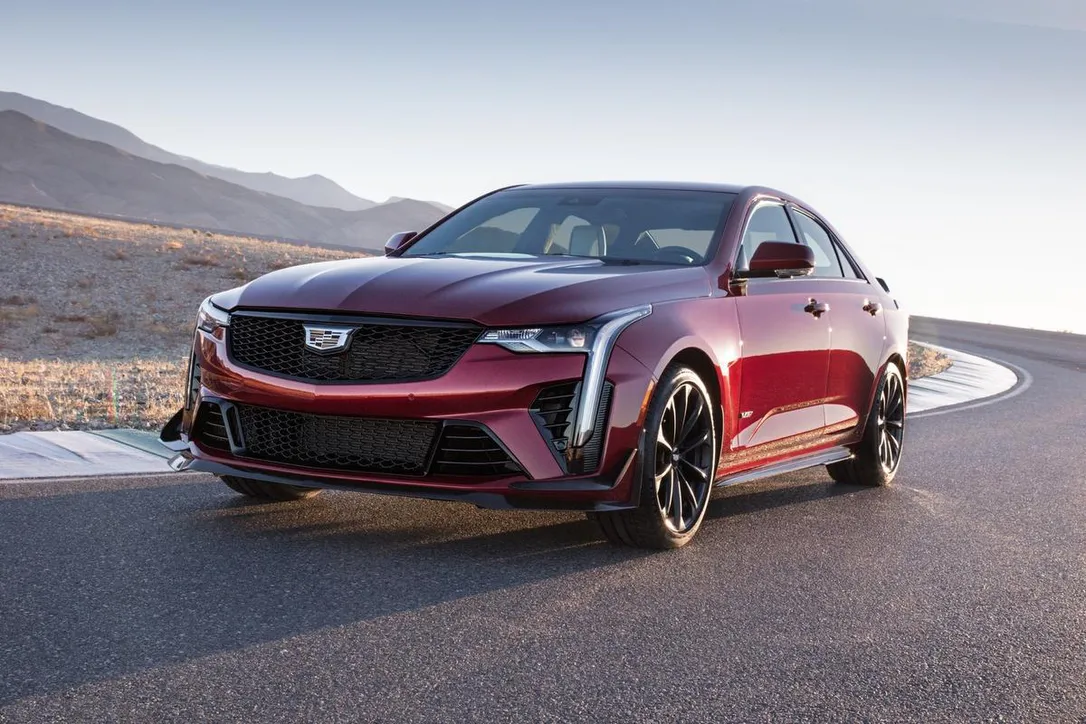

In [3]:
#Import necessary library 
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.utils import plot_model
from glob import glob
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Softmax
from tensorflow.keras.optimizers import Adam

# **load image in train path and test path **

In [4]:
Image_size = [224,224]
train_path="../input/cars-brand-dataset/dataset/Images/Train"
valid_path="../input/cars-brand-dataset/dataset/Images/Test"

# RESNET50
********A convolutional neural network with 50 layers is called ResNet-50. A common neural network that serves as the foundation for many computer vision applications is called ResNet, short for Residual Networks. The main innovation with ResNet was that it enabled us to train very deep neural networks with more than 150 layers. In their 2015 computer vision research paper titled "Deep Residual Learning for Image Recognition," Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun initially presented this novel neural network.**

******The "Vanishing Gradient Issue" is a serious drawback for convolutional neural networks. Gradient value greatly reduces during backpropagation, therefore weights scarcely change at all. ResNet is employed to get around this. It uses the "SKIP CONNECTION" feature.************

# The main architecture of RESNET50

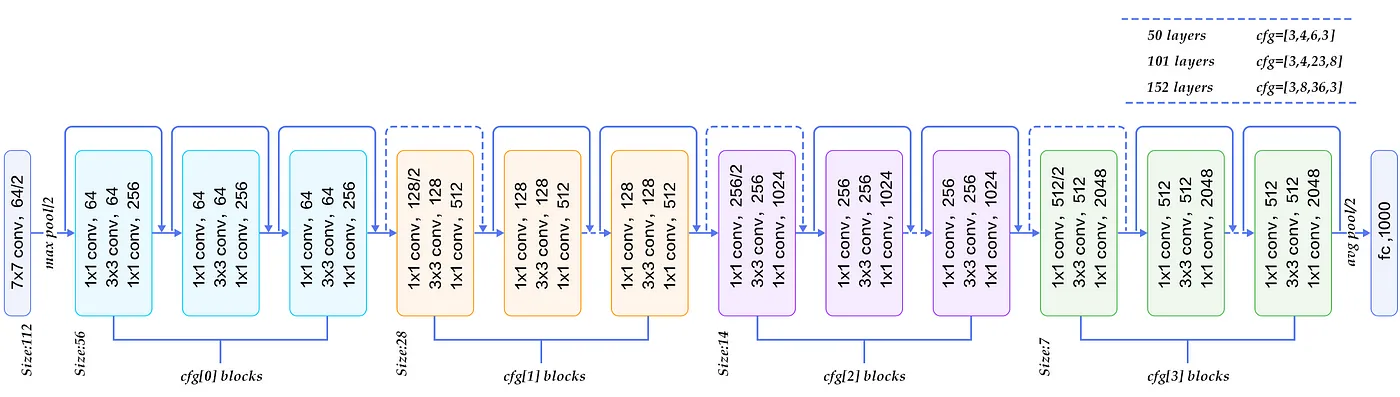


# Skip Connection :— 
*Adding the original input to the output of the convolutional block*

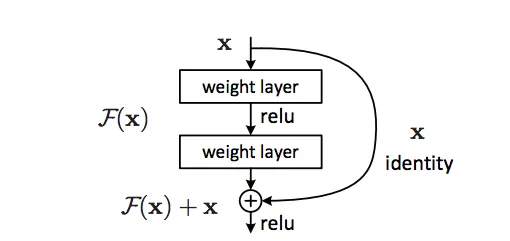

*All algorithms train on the output ‘Y’ but, ResNet trains on F(X). In simpler words, ResNet tries to make F(X)=0 so that Y=X.*

 source :  <a href = "https://blog.devgenius.io/resnet50-6b42934db431">read more</a>

# plot model using ResNet50 images 

94765736/94765736 [==============================] - 1s 0us/step


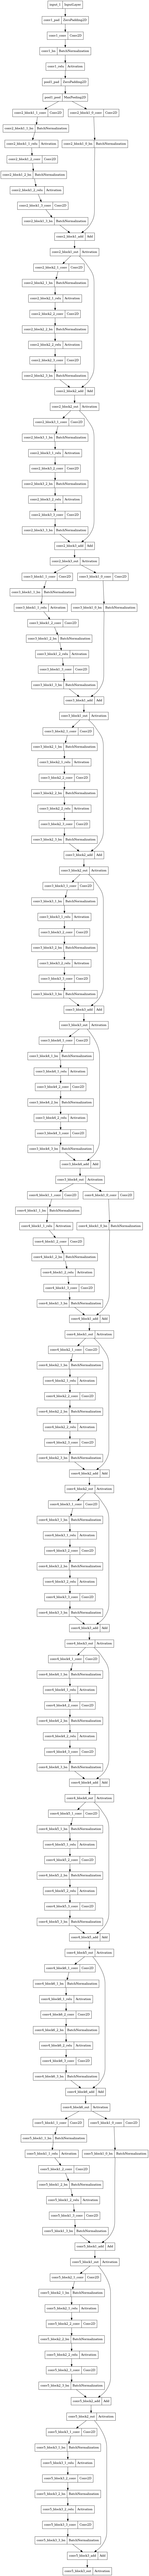

In [5]:
resnet = ResNet50(include_top=False,input_shape=Image_size+[3],weights='imagenet')
plot_model(resnet)

In [7]:
for layer in resnet.layers:
    layer.trainable=False
    

# glob is used when multiple file in a folder .

In [8]:
folders = glob("../input/cars-brand-dataset/dataset/Images/Train/*")
folders

['../input/cars-brand-dataset/dataset/Images/Train/mercedes',
 '../input/cars-brand-dataset/dataset/Images/Train/lamborghini',
 '../input/cars-brand-dataset/dataset/Images/Train/audi']

***import different types of layer such as Flatten layer that represent single dimensional data and Dense layer that work in fully connected layer .In this section used in dropout that is needed when there is overfitting .Also used a function that name is softmax function that is used when multiple class is in dataset .***

In [9]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,Softmax

In [10]:
x = Flatten()(resnet.output)
prediction = Dense(len(folders),activation = 'softmax')(x)
model = Model(inputs = resnet.input , outputs = prediction)
plot_model(model)
model.compile (loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])


***Import ImageDataGenerator to generate training data and testing data.In training data generation rescale image ,shear range ,zoom range etc .But in testing data generation only scaling the image data .***

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255,shear_range = 0.2,
                                  zoom_range = 0.2, horizontal_flip =True)
test_datagen = ImageDataGenerator(rescale = 1/255)

***Extract train and test data from train and test folder using flow_from_directory or globe ***

In [13]:
training_set = train_datagen.flow_from_directory("../input/cars-brand-dataset/dataset/Images/Train",target_size =(224,224), batch_size = 32,class_mode = "categorical")
test_set = test_datagen.flow_from_directory("../input/cars-brand-dataset/dataset/Images/Test",target_size =(224,224), batch_size = 32,class_mode = "categorical")

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


*****Now fit the model and run 20 epochs* ****

In [14]:
r= model.fit (training_set,validation_data=test_set,epochs=20,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/20
2/2 [==============================] - 22s 15s/step - loss: 5.9554 - accuracy: 0.2500 - val_loss: 10.0758 - val_accuracy: 0.1552
Epoch 2/20
2/2 [==============================] - 12s 9s/step - loss: 7.3532 - accuracy: 0.3438 - val_loss: 1.0060 - val_accuracy: 0.5172
Epoch 3/20
2/2 [==============================] - 13s 9s/step - loss: 2.9100 - accuracy: 0.4375 - val_loss: 5.2503 - val_accuracy: 0.3276
Epoch 4/20
2/2 [==============================] - 12s 9s/step - loss: 2.6947 - accuracy: 0.4844 - val_loss: 2.1622 - val_accuracy: 0.2586
Epoch 5/20
2/2 [==============================] - 17s 13s/step - loss: 2.3661 - accuracy: 0.4844 - val_loss: 2.9255 - val_accuracy: 0.5172
Epoch 6/20
2/2 [==============================] - 13s 9s/step - loss: 2.4754 - accuracy: 0.4844 - val_loss: 1.8268 - val_accuracy: 0.2069
Epoch 7/20
2/2 [==============================] - 12s 9s/step - loss: 1.4117 - accuracy: 0.4531 - val_loss: 2.5032 - val_accuracy: 0.3276
Epoch 8/20
2/2 [===============

***Plot the loss and accuracy score using matplotlib library ***

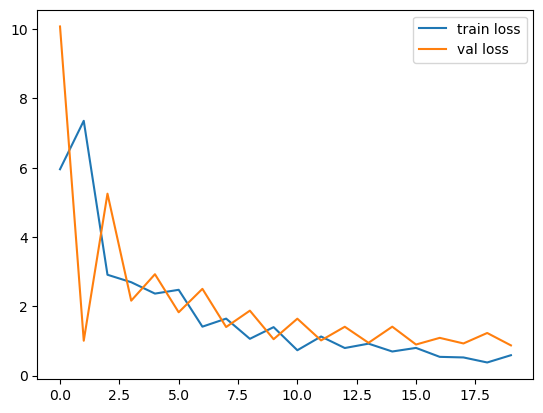

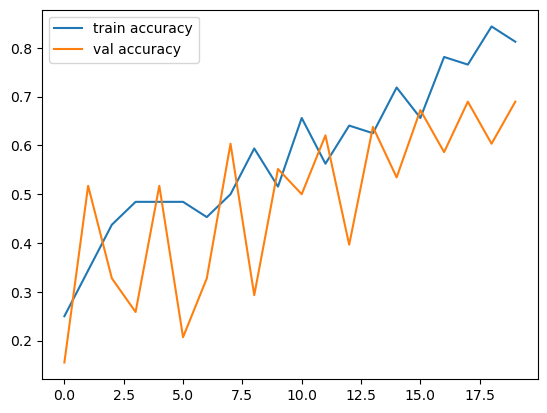

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
#plot accuracy 
plt.plot(r.history['accuracy'],label= 'train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

***Save the model and predict value ***

In [16]:
import numpy as np
from tensorflow.keras.models import load_model
model.save('../working/model_resnet50.h5')
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred,axis=1)

2/2 [==============================] - 7s 2s/step


In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image 
model = load_model('../working/model_resnet50.h5')

**Input image and predict image**

In [22]:
img= image.load_img('../input/cars-brand-dataset/dataset/Images/Test/lamborghini/10.jpg',target_size=(224,224))
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [23]:
preds=model.predict(x)
preds=np.argmax(preds,axis=1)
if preds==1:
    preds= "the car is Audi"
elif preds==2:
    preds="the car is Lamborghini"
else:
    preds="the car is Mercedes"

1/1 [==============================] - 0s 132ms/step


In [24]:
print (preds)

the car is Lamborghini
